In [63]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

# Machine Learning Engineer Nanodegree
## Estimating Cartel Damages using Machine Learning Techniques
Oliver März  
February 02, 2018

## I. Definition
_(approx. 1-2 pages)_

### Project Overview
In antitrust economics it is a common challenge to quantify the extent of damages caused by the misconduct of firms. A prominent example is when competing firms form a cartel and make agreements to raise prices above competitive levels. When firms agree to limit the extent of competition in the market, customers pay a higher price than they would have paid absent the
agreement. Such agreements are illegal in many jurisdictions around the world and, if discovered, firms have to pay fines in order to compensate their clients for the damages that were caused by the illegitimate higher prices. 

The magnitude of damages that have to be compensated depends on the difference between the price that was charged during the cartel period and the price that would have prevailed absent the cartel. Practitioners in antitrust economics therefore face the challenge to make predictions about these counterfactual "but-for" prices. This is often a difficult undertaking as multiple factors, ranging from supply and demand-side determinants, to other industry specific characteristics, need to be taken into consideration when trying to predict prices that would have prevailed absent the cartel. A common approach in the economics profession is to apply multivariate OLS regression analysis to capture the effects of multiple explanatory variables on prices. A comprehensive overview of this approach could be found in Chapter 7 of Davis & Garcés (2009).

In this project, I demonstrate how machine learning techniques can be used to aid practitioners to derive more acurate predictions of counterfactual "but-for" prices. I argue that the usage of machine learning algorithms enriches the economist's toolbox and allows to draw deeper insights from the underlying data. In particular, economists are trained to understand which factors (i.e. explanatory variables) are most decisive in the development of prices in various industries. Based on the fundamental premise of cross-validation and grid search, machine learning algorithms could then be used to spot hidden non-linear relationships between these explantory variables, which standard OLS regression models might not be able to capture. This feature should allow machine learning predictions to achieve higher scores on various out-of-sample evaluation metrics, giving economists greater confidence in the accuracy of their models and the resulting estimate of cartel-related damages.

### Problem Statement
In this project, I use supervised machine learning to make predictions about "but-for" prices in a prominent antitrust case of price-fixing. Between 2001 and 2006, Chinese exporters to the US formed a cartel and raised export prices for Vitamin C products above competitive levels. After the cartel had been uncovered, the exporting firms were charged a total amount of fines of $54.1 million dollars. The magnitude of these damages was determined by the econometric model of Professor Douglas B. Bernheim, presented in his report for the United State District Court. The US court considered the predicted "but-for" prices by Professor Bernheim as the prices that would have prevailed in a regular competitive environment (The Bernheim report can be downloaded from this source: 
www.appliedantitrust.com/04_private_actions/damages/vitamin_c/vitamin_c_edny_bernheim_report11_14_2008.pdf).

I use the model and the predicted "but-for" prices of the Bernheim report as a benchmark for my model. I reconstruct the dataset that is used in the Bernheim report, using information from publicly available sources. In cases where data is not publicly available, I use graphical digitization software to reproduce data that is provided in graphical format only in the Bernheim report (https://automeris.io/WebPlotDigitizer/). A complete overview of the dataset along with information on the sources is provided below.

The explicit goal of this project is to build a sophisticated machine learning algorithm that is more flexible than the applied OLS regression model from the Bernheim report, and that produces predictions which achieve higher scores on out-of-sample evaluation metrics. To do so, I repeatedly split the dataset in a training and a test set, fit a machine learning model on the training set, make predictions on the hold-out test set, and subsequently fine-tune the model based on the feedback of the accuracy of the predictions. Based on this strategy, I can simulate and evaluate the model's capacity to perform out-of-sample predictions. 
If the optimized predictions are more accurate on holdout testsets than those of the benchmark model, it seems reasonable to assume that the machine learning model could also produce more accurate predictions for the hypothetical out-of-sample scenario that no cartel existed. As a final step, I compare the damages that result from the "but-for" prices predicted by the machine learning model, with the damages that have actually been charged.

### Metrics
The metric that I use to quantify the performance of both the benchmark model and the machine learning model is the "mean squared error (MSE)" of predictions on a hold-out testset. This metric measures the squared error of the forcasts of the predicted Vitamin C prices and is thus an indicator of the measured difference between prices predicted by a model and the prices actually observed. We prefer a model with a small MSE, which implies that the model's predicted prices are close to the actual prices. Finally, the model with the lowest MSE is used to make predictions for the counterfactual scenario that no cartel existed.

The formula for the MSE is given below, where $n_{samples}$ is the number of observations in the hold-out test set, $\hat{y_i}$ is the predicted value of the i-th observation and $y_i$ is the true value. 

$$ MSE(y,\hat{y}) = \frac{1}{n_{samples}} \sum_{i=0}^{n_{samples}-1} (y_i - \hat{y_i})^2 $$

## II. Analysis
_(approx. 2-4 pages)_

### Data Exploration
Tha dataset contains information on Vitamin C prices, as well as information on 6 explanatory variables that are used in the Bernheim report to describe the development of Vitamin C prices. Data is provided in monthly format and has been collected for the period January 1998 to March 2008. This period comprises a total of 123 monthly observations. The dataset can be divided in the **cartel period** which includes 55 months of observations, from December 2001 to June 2006, and the **non-cartel** period which includes 68 months of regular competetitive conditions, from January 1998 to November 2001 as well as from July 2006 to March 2008. The explicit cartel period was determined in the Bernheim report and will be taken as exogenously given for this project. 

#### Target variable:
- **Price**: Monthly Vitamin C price (in \$) for imports from China to the US. The data is obtained from the US ITC (International trade commission) website using import data (HTS 293627). The U.S. Customs Service and the ITC track monthly imports of Vitamin C using HTC code 293627-0000 (https://dataweb.usitc.gov/scripts/user_set.asp).

#### Explanatory variables:
- **Sorbitol**: The price of sorbitol (in \$). Sorbitol is a sugar alcohol and a major input in the production of Vitamin C products. Increases in the price of Sorbitol increase the production costs of Vitamin C products and put an upward pressure on prices, independently of any cartel agreements. For this price series, Asia Pacific sorbitol spot prices are used. The data was digitized from the Bernheim report (Figure 20, p. 36).

- **Energy**: The price of energy (in \$). Energy is another major input in the production of Vitamin C products. Increases in the price of oil or coal, which are used to produce energy, increase the production costs of Vitamin C products and put an upward pressure on prices. This price series contains information on reported energy costs by one cartel member during the litigation procedure. The data was digitized from the Bernheim report (Figure 67, p.95).

- **Soft_Drink**: Industrial production index of soda drinks (2002 = 100). The most important buyers of Vitamin C products are soda producers. Vitamin C products are a major input in the production of soda drinks. The industrial production index for soda drinks is a measure of the demand for soda products. If the demand for soda rises, more Vitamin C is demanded by soda producers, putting an upward pressure on Vitamin C prices, independently of any cartel agreements. The data is obtained from the U.S. Federal Reserve Board of Governors IPI data (http://www.federalreserve.gov/datadownload/Build.aspx?rel=G17, NAICS 31211).

- **Orange_Juice**: The average price of orange juice (in \$). Orange juice is an important end-user substitute for Vitamin C products. If the price of orange juice increases, consumers may demand more Vitamin C products, as they substitute away from orange juice. The increased demand for Vitamin C products puts an upward pressure on Vitamin C prices. The data is obtained using the orange juice consumer price index (CPI) reported by the Bureau of Labor Statistics (www.bls.gov/data, APU0000713111).

- **PriceL1, PriceL2**: One-month and two-month lagged prices of Vitamin C (in \$). The inclusion of lagged prices as predictors for actual prices allows to generate a wide range of dynamic patterns, such as gradual adjustment from one price level to another. For example, manufactures of Vitamin C products may incur costs when building new capacity and, as a result, may increase prices over several periods to accomodate these expenses. An observed increase in the price of Vitamin C might then not be due to cartel agreements but rather a response to the investment several periods earlier. Thus, including lagged prices allows for the possibility that a temporary development might have persistent (but dissipating) effects on prices.

#### Key characteristics:
The output below provides cental descriptive statistics, along with a sample of the raw dataset. The descriptive statistics show that information on energy prices is missing for 5 months. All variables are measured in dollar prices, bar the "Soft_Drink" variable which is measured as a price index. Considering the interquartile range (75% Quantile - 25% Quantile) and the minimum and maximum values of each variable, suggests that there are no severe outliers that would need to be addressed.

In [2]:
# Import packages
import numpy as np
import pandas as pd

# Import supplementary visualization code visuals.py
from IPython.display import display # Allows the use of display() for DataFrames

# Pretty display for notebooks
%matplotlib inline

# Import data and code data
file_path = "DatasetCSV.csv"
data= pd.read_csv(file_path,delimiter=";",na_values=' -     ',parse_dates=["Year/Month"], index_col = ["Year/Month"])
data = data.rename(columns = {"Vitamin C Price": "Price", "Sorbitol Price":"Sorbitol","Weisheng Energy Cost":"Energy","Soft Drink Production":"Soft_Drink","Orange Juice Price Index":"Orange_Juice"})
data["PriceL1"] = data["Price"].shift(1)    # Create Lagged Prices
data["PriceL2"] = data["Price"].shift(2)    # Create Lagged Prices
data["SorbitolL1"] = data["Sorbitol"].shift(1)
data["EnergyL1"] = data["Energy"].shift(1)
data["Soft_DrinkL1"] = data["Soft_Drink"].shift(1)
data["Orange_JuiceL1"] = data["Orange_Juice"].shift(1)
data["Timestamp"] = data.index
quantity = data["Net Quantity"].dropna()
quantity = pd.to_numeric(quantity.str.strip().str.replace(",","")) #Convert quantity variable from "str" to "int"

print("Descriptive Statistics: \n")
display(data.describe().iloc[:,[0,1,2,3,4,6,7]])
print("\n Data sample: \n")
display(data.head(10).iloc[:,[0,1,2,3,4,8,9]])

Descriptive Statistics: 



,Price,Sorbitol,Energy,Soft_Drink,Orange_Juice,PriceL1,PriceL2
count,123.000000,123.000000,118.000000,123.000000,123.000000,122.000000,121.000000
mean,4.477707,0.351351,0.621141,111.999639,1.918894,4.455443,4.436521
std,1.013405,0.062040,0.218665,10.535294,0.243140,0.986914,0.968541
min,3.076000,0.278997,0.317895,92.381575,1.568000,3.076000,3.076000
25%,3.519500,0.299354,0.429118,103.453677,1.806500,3.498250,3.477000
50%,4.512000,0.340556,0.553368,110.703098,1.863000,4.455000,4.398000
75%,5.071000,0.369927,0.811111,118.675434,1.915000,5.067750,5.061000
max,7.194000,0.556150,1.064015,142.737592,2.590000,6.858000,6.858000



 Data sample: 



,Price,Sorbitol,Energy,Soft_Drink,Orange_Juice,PriceL1,PriceL2
Year/Month,,,,,,,
1998-01-01,5.190,0.398880,1.064015,99.038437,1.601,NaN,NaN
1998-02-01,5.072,0.393338,1.019190,100.880150,1.568,5.190,NaN
1998-03-01,5.267,0.387231,0.917910,103.974804,1.587,5.072,5.190
1998-04-01,5.418,0.379427,0.942971,105.769497,1.634,5.267,5.072
1998-05-01,5.295,0.371284,1.014121,114.186418,1.589,5.418,5.267
1998-06-01,5.287,0.364724,0.969298,118.446468,1.633,5.295,5.418
1998-07-01,5.351,0.367891,1.013820,117.090948,1.655,5.287,5.295
1998-08-01,5.152,0.368796,1.056094,114.832671,1.668,5.351,5.287
1998-09-01,5.204,0.354247,1.029705,115.142088,1.599,5.152,5.351


### Exploratory Visualization
Seperated by tabs, the following graphs offer a high-level overview of the structure of the data. In each tab, the top graph plots the development of Vitamin C prices and the selected explanatory variable over time. The bottom graph plots the relationship between Vitamin C prices and the selected explanatory variable in a scatter plot, along with a "best-fit" line and information on the Pearson correlation coefficient. 

The visual analysis offers the following insights: 

- The Vitamin C price time series has two clear hikes - the first starting around January 2003 and lasting until December 2004, and the second starting from 2007 onwards. Given information on the alleged cartel period, which lasted from December 2001 until June 2006, the first price hike might be explained by illicit price fixing agreements between competing Vitamin C producers. On the other hand, it should be noted that prices in 2002 and from 2005 until June 2006, did not substantially differ from prices in the pre-cartel period. Therefore, it could also be the case that the cartel did not have significant power to raise prices above competitive levels, and that the observed price hike might be explained by changes in market developments. Such changes in market developments are likely to explain the second price hike, which falls outside the cartel period. The occurance of this price hike could therefore provide helpful information about the most important factors determining Vitamin C prices, absent illicit cartel agreements.

- Prices for Sorbitol, the main input in Vitamin C production, remained largely flat in 2003 and only started to slightly increase from 2004 onwards. Sorbitol prices and Vitamin C prices are weakly correlated, with a correlation coefficient of 0.26, indicating that the high level of Vitamin C prices in the post-cartel period from 2007 onwards, might be partly attributed to higher Sorbitol costs during that period. 

- Costs for energy, another main input in Vitmamin C production followed a downward trend from 1998 onwards. Energy costs and Vitamin C prices are moderately correlated, with a correlation coefficient of 0.42. However, there seems to be no drastic upward spikes in energy costs during the cartel period which could reasonably explain the observed higher prices for Vitamin C. 

- Soft drink production and orange juice prices, two main demand-side drivers of Vitmain C prices, also do not seem to explain the first price hike in Vitamin C prices during the cartel period. The production of soft drinks follows seasonal patterns and these patterns remain largely stable during the cartel period. These patterns also explain that Vitamin C prices and soft drink production are interdependent but seemingly uncorrelated, with a correlation coefficient of -0.07, because Vitamin C prices do not follow the same seasonal fluctuations. Orange juice prices also remained largely unchanged during the cartel period. The second price hike in Vitmain C prices, however, coincides with a period of surging prices for orange juice and a generally higher level of soft drink production. This indicates that distinct changes in these two demand-side factors combined might explain movements in Vitmain C prices.

To summarize, the visual analysis highlights that there were no significant changes in market development that could explain the first price hike during the cartel period. This insight hints at the fact that the price increases were due to anticompetitive agreements. On the other hand, the second post-cartel price hike from 2007 onwards, is much more likely to be explained by market factors, due to rising costs of Sorbitol, greater soft drink production and higher prices for orange juice as substitute products. 

In [5]:
# Import modules from Bokeh
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, LinearAxis, Range1d, Label
from bokeh.models.widgets import Panel,Tabs
from bokeh.layouts import column
from bokeh.io import output_notebook
from bokeh.resources import INLINE

# Set up data for visualization
output_notebook(INLINE)
data["Timestamp"] = data.index
source = ColumnDataSource(data)

# Create Tab 1
p1 = figure(x_axis_type = "datetime", plot_width = 800, plot_height = 200,toolbar_location=None)
p1.y_range = Range1d(0,max(data["Price"])+3.5)
p1.extra_y_ranges = {"Costs": Range1d(start=0, end=1.5)}
p1.add_layout(LinearAxis(y_range_name="Costs",axis_label="Sorbitol price ($/kg)"),"right")
p1.yaxis[0].axis_label="Vitamin C price ($/kg)"
p1.xaxis.axis_label = "Year"
p1.line(x = "Timestamp", y = "Price", source=source, line_color = "red",line_width=2,legend="Vitamin C price")
p1.line(x = "Timestamp", y = "Sorbitol", source=source, y_range_name = "Costs",line_width=2,legend="Sorbitol price")
p1.legend.location = "top_left"
p1.legend.orientation = "horizontal"

p2 = figure(plot_width = 800, plot_height = 200,toolbar_location=None)
p2.circle(x="Sorbitol",y="Price",source=source)
p2.yaxis.axis_label = "Vitamin C price ($/kg)"
p2.xaxis.axis_label = "Sorbitol price ($/kg)"
slope,intercept = np.polyfit(data["Sorbitol"],data["Price"],1)  #Compute slope and intercept of best-fit line
correlation = np.corrcoef(data["Sorbitol"],data["Price"])[0,1]
x_values = np.array([min(data["Sorbitol"]),max(data["Sorbitol"])]) #Set X values for best-fit line
p2.line(x=x_values,y=intercept + slope*x_values,color="red",line_width=2) #Draw best-fit line
comment = Label(x=0.51, y=4.3, x_units='data', y_units='data', text="Correlation = {}".format(np.round(correlation,2)))
p2.add_layout(comment)
layout1 = column(p1,p2)
tab1 = Panel(child=layout1,title="Sorbitol")

# Create Tab 2
p3 = figure(x_axis_type = "datetime", plot_width = 800, plot_height = 200,toolbar_location=None)
p3.y_range = Range1d(0,max(data["Price"])+3.5)
p3.extra_y_ranges = {"Costs": Range1d(start=0, end=1.5)}
p3.add_layout(LinearAxis(y_range_name="Costs",axis_label="Energy cost ($/Unit)"),"right")
p3.yaxis[0].axis_label="Vitamin C price ($/kg)"
p3.xaxis.axis_label = "Year"
p3.line(x = "Timestamp", y = "Price", source=source, line_color="red",line_width=2,legend="Vitamin C price")
p3.line(x = "Timestamp", y = "Energy", source=source, y_range_name = "Costs",line_width=2,legend="Energy unit cost")
p3.legend.location = "top_left"
p3.legend.orientation = "horizontal"
p3.legend.background_fill_alpha = 0.1

p4 = figure(plot_width = 800, plot_height = 200,toolbar_location=None)
p4.circle(x="Energy",y="Price",source=source)
p4.yaxis.axis_label = "Vitamin C price ($/kg)"
p4.xaxis.axis_label = "Energy cost ($/Unit)"
slope,intercept = np.polyfit(data["Energy"][:-6],data["Price"][:-6],1)  #Compute slope and intercept of best-fit line
correlation = np.corrcoef(data["Energy"][:-6],data["Price"][:-6])[0,1] #Compute correlation coefficient
x_values = np.array([min(data["Energy"]),max(data["Energy"])]) #Set X values for best-fit line
p4.line(x=x_values,y=intercept + slope*x_values,color="red",line_width=2) #Draw best-fit line
comment = Label(x=0.93, y=4.1, x_units='data', y_units='data', text="Correlation = {}".format(np.round(correlation,2)))
p4.add_layout(comment)
layout2 = column(p3,p4)
tab2 = Panel(child=layout2,title="Energy")

# Create Tab 3
p5 = figure(x_axis_type = "datetime", plot_width = 800, plot_height = 200,toolbar_location=None)
p5.y_range = Range1d(0,max(data["Price"])+3.5)
p5.extra_y_ranges = {"Costs": Range1d(start=90, end=150)}
p5.add_layout(LinearAxis(y_range_name="Costs",axis_label="Index (2002=100)"),"right")
p5.yaxis[0].axis_label="Vitamin C price ($/kg)"
p5.xaxis.axis_label = "Year"
p5.line(x = "Timestamp", y = "Price", source=source,line_color="red",line_width=2,legend="Vitamin C price")
p5.line(x = "Timestamp", y = "Soft_Drink", source=source, y_range_name = "Costs",line_width=2,legend="US soft drink production index")
p5.legend.location = "top_left"
p5.legend.orientation = "horizontal"

p6 = figure(plot_width = 800, plot_height = 200,toolbar_location=None)
p6.circle(x="Soft_Drink",y="Price",source=source)
p6.yaxis.axis_label = "Vitamin C price ($/kg)"
p6.xaxis.axis_label = "Soft drink index (2002=100)"
slope,intercept = np.polyfit(data["Soft_Drink"],data["Price"],1)  #Compute slope and intercept of best-fit line
correlation = np.corrcoef(data["Soft_Drink"],data["Price"])[0,1] #Compute correlation coefficient
x_values = np.array([min(data["Soft_Drink"]),max(data["Soft_Drink"])]) #Set X values for best-fit line
p6.line(x=x_values,y=intercept + slope*x_values,color="red",line_width=2) #Draw best-fit line
comment = Label(x=132, y=6.5, x_units='data', y_units='data', text="Correlation = {}".format(np.round(correlation,2)))
p6.add_layout(comment)
layout3 = column(p5,p6)
tab3 = Panel(child=layout3,title="Soft_Drink")

# Create Tab 4
p7 = figure(x_axis_type = "datetime", plot_width = 800, plot_height = 200,toolbar_location=None)
p7.y_range = Range1d(0,max(data["Price"])+3.5)
p7.extra_y_ranges = {"Costs": Range1d(start=1.5, end=2.6)}
p7.add_layout(LinearAxis(y_range_name="Costs",axis_label="O. Juice price ($/Pound)"),"right")
p7.yaxis[0].axis_label="Vitamin C price ($/kg)"
p7.xaxis.axis_label = "Year"
p7.line(x = "Timestamp", y = "Price", source=source, line_color="red",line_width=2,legend="Vitamin C price")
p7.line(x = "Timestamp", y = "Orange_Juice", source=source, y_range_name = "Costs",line_width=2,legend="US CPI Orange juice price")
p7.legend.location = "top_left"
p7.legend.orientation = "horizontal"

p8 = figure(plot_width = 800, plot_height = 200,toolbar_location=None)
p8.circle(x="Orange_Juice",y="Price",source=source)
p8.yaxis.axis_label = "Vitamin C price ($/kg)"
p8.xaxis.axis_label = "Orange juice price ($/Pound)"
slope,intercept = np.polyfit(data["Orange_Juice"],data["Price"],1)  #Compute slope and intercept of best-fit line
correlation = np.corrcoef(data["Orange_Juice"],data["Price"])[0,1] #Compute correlation coefficient
x_values = np.array([min(data["Orange_Juice"]),max(data["Orange_Juice"])]) #Set X values for best-fit line
p8.line(x=x_values,y=intercept + slope*x_values,color="red",line_width=2) #Draw best-fit line
comment = Label(x=2.15, y=5, x_units='data', y_units='data', text="Correlation = {}".format(np.round(correlation,2)))
p8.add_layout(comment)
layout4 = column(p7,p8)
tab4 = Panel(child=layout4,title="Orange_Juice")

tabs = Tabs(tabs=[tab1,tab2,tab3,tab4])
show(tabs)

Loading BokehJS ...

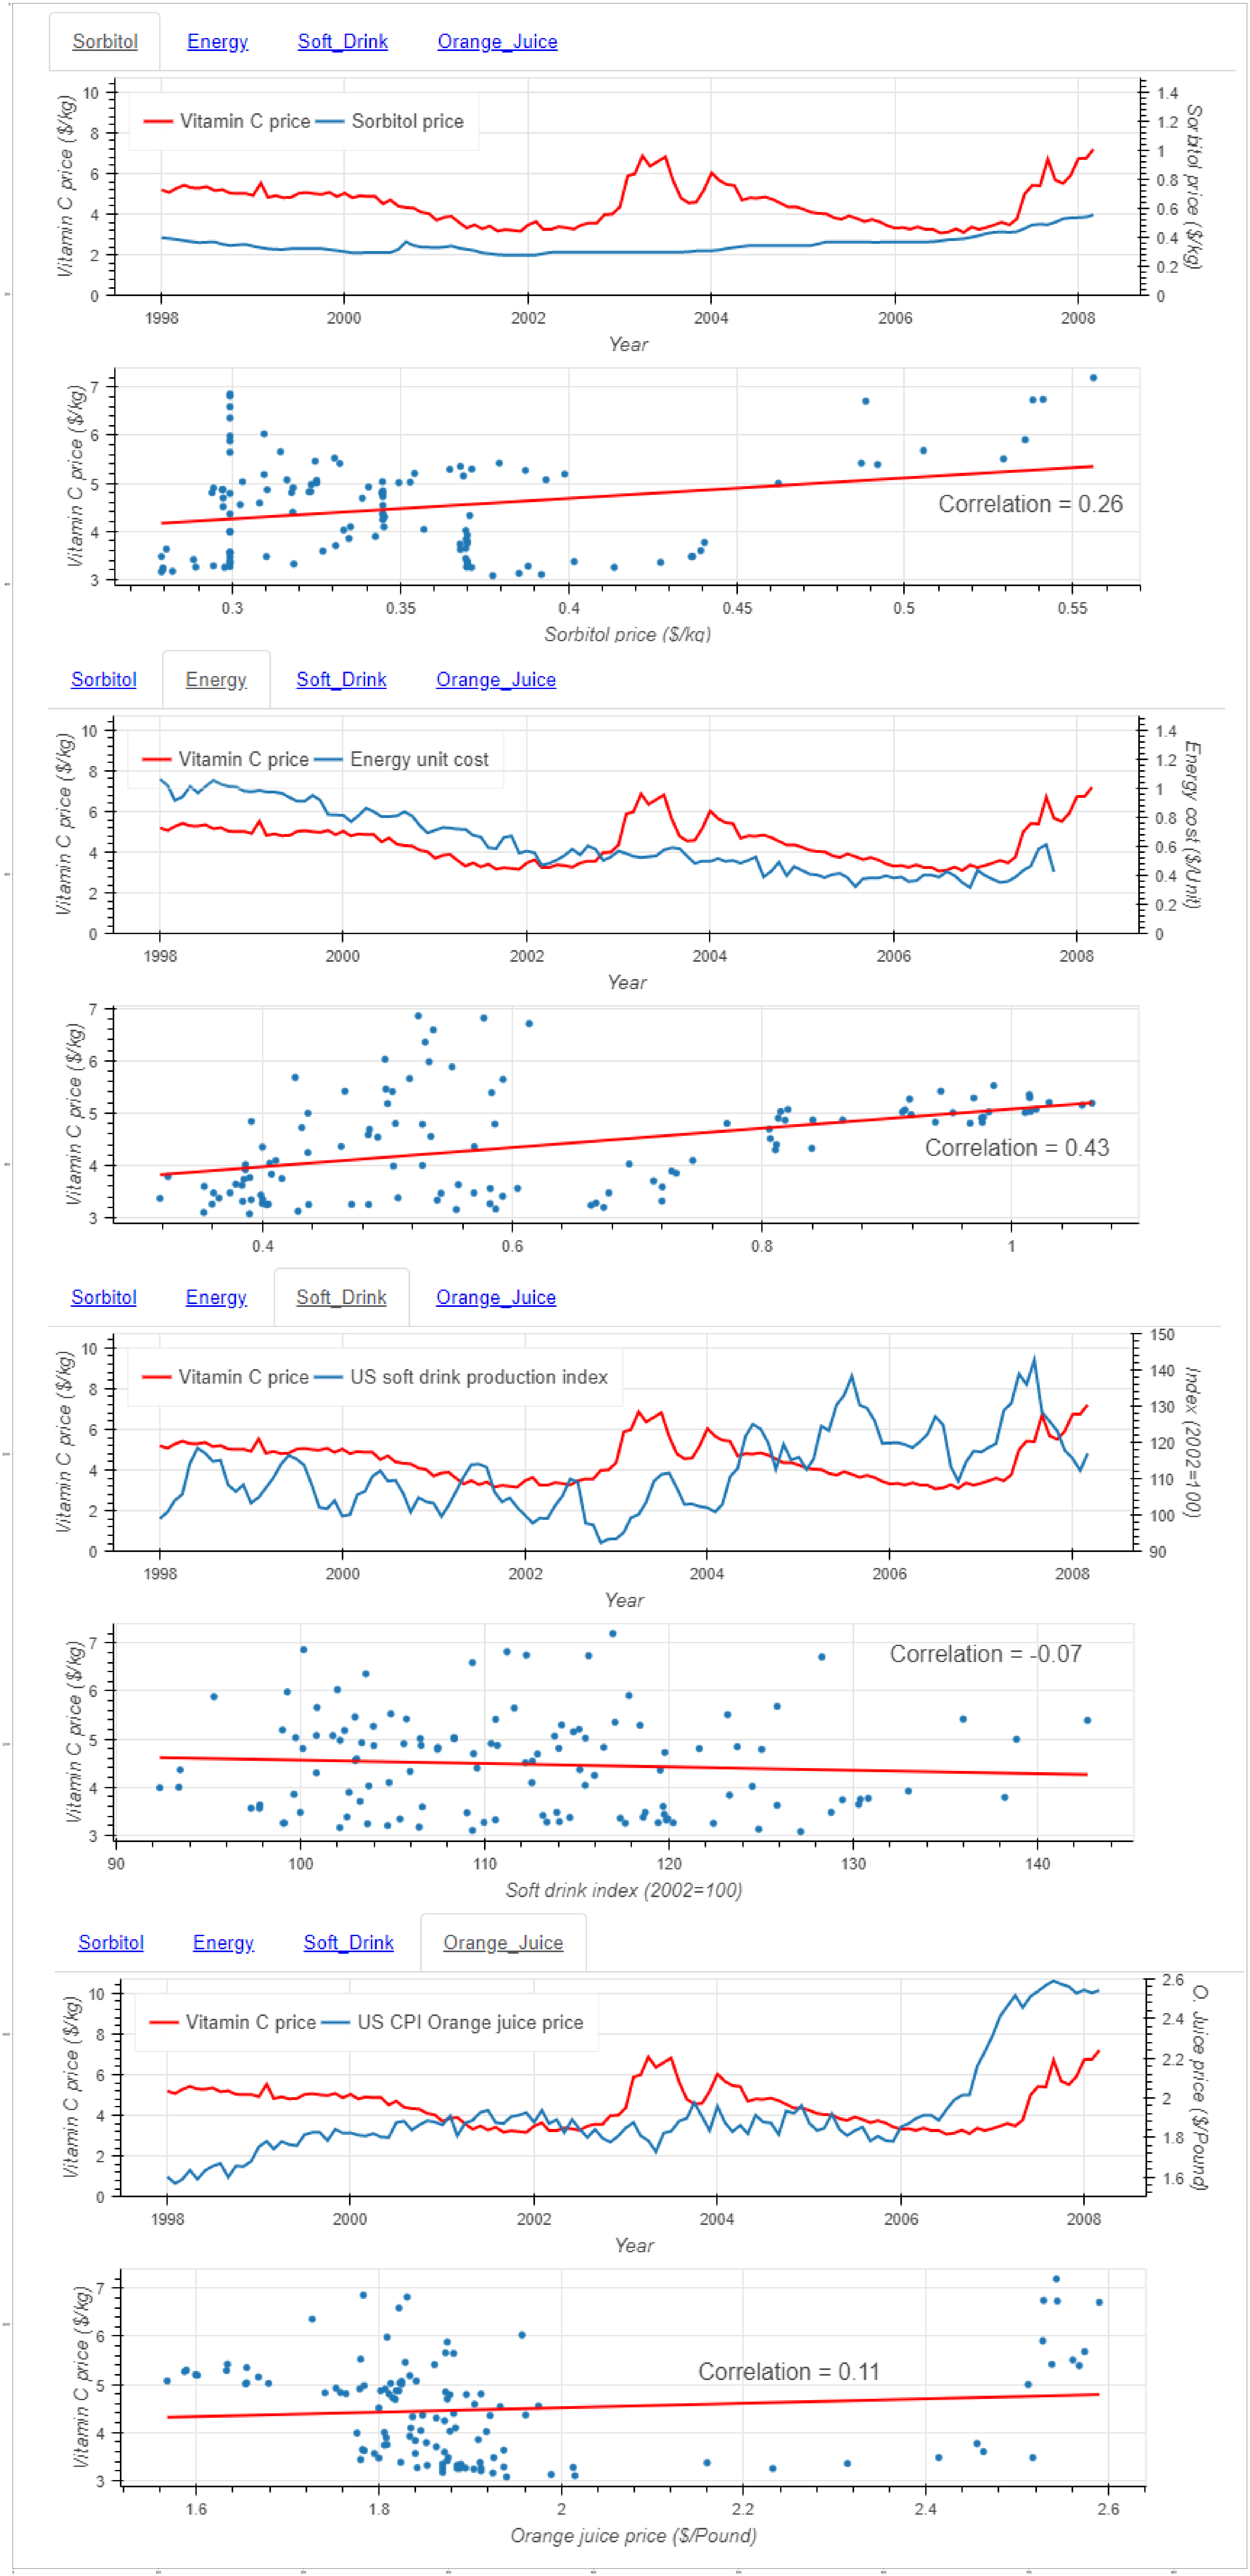

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(200,150))
img = mpimg.imread("BildGesamt.png")
imgplot = plt.imshow(img)
plt.show()

### Algorithms and Techniques
The task to predict Vitamin C prices is a regression task, because the predicted variable takes on continuous values. There are many machine learing algorithms that could potentially be used for this task and all come with certain advantages and disadvantages. In this project, a **Gradient Boosting Regressor (GBR)** algorithm will be used to address the prediction problem. 

The GBR algorithm is a popular machine learning algorithm that could generate highly accurate predictions. It is a "ensemble" method which builds on combining simple "Decision Tree Regressor" algorithms, to avoid some shortcomings of these algorithms. A decision tree algorithm splits the data according to explanatory variables that "best" divide the outcome space roughly in half. This process can be continued until there are no more explanatory variables to perform an additional split. A shortcoming of this approach is that the decision tree can easily become too complex and is prone to overfitting. Furthermore, as decision trees focus on splitting the data successively, based on single explanatory variables, they cannot detect complex interdependent relationsships between features which might be important drivers of observed outcomes.

Ensemble methods, like the GBR algorithm, take several simple decision tree algorithms, merge them together and produce a sophisticated non-linear regression algorithm. In general, by combining several of such simple algorithms, ensemble methods can detect complex relationships in the data, greatly enhance the accuracy of predictions, while at the same time reduce the risk of overfitting. A remaining shortcoming of the GBR algorithm is that is susceptive to noise and outliers in the data. However, as established in the descriptive analysis, outliers are not likely to pose a serious problem in this setup. Furthermore, as a pre-processing step, before fitting the algorithm, all explanatory variables will be normalized to avoid that the algorithm models any noise, arising from a different scaling between variables.  

The GBR algorithm can be fine-tuned based on a set of "hyper-parameters" that specify how exactly the algorithm is fitted to the data. From the outset it is generally hard to know which set of hyper-parameters generates the best fit that maximizes the accuracy of the algorithm on out-of-sample predictions. A common technique to determine the choice of hyper-parameters is to use **Grid Search**. The grid search technique loops of several parameter choices of the algorithm, fits a model for each parameter specification and subsequently calculates the MSE of the model's predictions on a hold-out test set. After looping over all parameters, the MSE for each specification can be compared. This allows to pick a set of parameters that best generalize to unseen data. In this project, to determine the optimal hyper-parameters, the technique of "Grid Search Cross-Validation" will be used, which combines the strategy of grid search with the evaluation technique of cross-validation. 

The accuracy of the GBR algorithm will be evaluated using **K-Fold cross-validation** on the non-cartel period part of dataset. K-Fold cross-validation divides the dataset into K bins. Subsequently, K-1 bins are used as a training set to fit the algorithm to the data. The holdout bin is used as a testing set. The fitted algorithm generates out-of-sample price predictions for the hold-out test set, which are then compared with the actual true prices. Thus, the accuracy of the algorithm is evaluated on its ability to produce predictions for situations it has never seen before. In general, it might be possible that the split in training and test sets is a lucky draw, resulting in a very high accuracy of the predictions. Therefore, the process is continued with the K-1 bins being reassigned, until each bin of the dataset has been used as a test set, thereby allowing the performance of the algorithm to be evaluated based on multiple training/test sets. Finally, by combining K-Fold cross validation with grid search, the algorithm will loop over all possible combinations of pre-specified hyper-parameters and for each specification compute the average cross-validated MSE. The algorithm with the set of hyperparameters, that achieves the lowest average cross-validated MSE is used to make final predictions for the counterfactual scenario that no cartel existed.

### Benchmark

The benchmark result against which the GBR algorithm will be evaluated is the average cross-validated MSE of the econometric model used in the Bernheim report.

The Benchmark model from the Bernheim report takes the form:

$$ ln(Price_t) = \beta_0 + \beta_1 Sorbitol_{t-1} + \beta_2 Energy_{t-1} + \beta_3 SoftDrink_{t-1} + \beta_4 OrangeJuice_{t-1} + \beta_5 ln(Price_{t-1}) + \beta_6 ln(Price_{t-2}) $$

The code below splits the dataset into a cartel and non-cartel period. Because of missing observations for energy prices and the inclusion of lagged prices 6 observations are lost, leaving a total of 62 observations for the non-cartel period. To derive the in-sample MSE, all 62 observations of the non-cartel period are used to fit the model, and subsequently the fitted model is used to make price predictions for the whole non-cartel period. To derive the average cross-validated MSE, K-Fold cross-validation with 5 folds is performed. This implies that at each cross-validation step a model is fitted using 50 months of observations during the non-cartel period, and subsequently predictions are made for the hold-out 12 months of observation. This procedure yields five results of a MSE for each cross-validation step, and the mean of those results yields the average cross-validated MSE. The benchmark model achieves an **in-sample MSE of 0.00344** and an **average cross-validated MSE of 0.00693**. Because the average cross-validated MSE quantifies the ability of the benchmark model to make predictions for out-of-sample data points it is used as a benchmark for measuring the performance of the machine learning model.

In [4]:
# Import modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import KFold, cross_val_score

# Drop redundant variables and missing observations#
data = data.drop(["Total quantity", "Net Quantity","Energy","Sorbitol","Soft_Drink","Orange_Juice"],axis=1)
data = data.dropna(axis=0)

# Generate prices in logs
data["lnprice"] = data["Price"].apply(np.log)
data["lnpriceL1"] = data["PriceL1"].apply(np.log)
data["lnpriceL2"] = data["PriceL2"].apply(np.log)

# Define cartel and non-cartel datasets#
X_in = data[data["Cartel"] == 0][["SorbitolL1","EnergyL1","Soft_DrinkL1","Orange_JuiceL1","lnpriceL1","lnpriceL2"]]
X_out = data[data["Cartel"] == 1][["SorbitolL1","EnergyL1","Soft_DrinkL1","Orange_JuiceL1","lnpriceL1","lnpriceL2"]]
y_in = data[data["Cartel"] == 0]["lnprice"]
y_out = data[data["Cartel"] == 1]["lnprice"]

#==============================================================================
# # Benchmark Linear Regression
#==============================================================================
learner1 = LinearRegression()
learner1.fit(X_in,y_in)
yhat_insample = learner1.predict(X_in)
score = mean_squared_error(y_in,yhat_insample) 
print("The in-sample MSE is: {}".format(score))

# Cross-Validation Score
scorer = make_scorer(mean_squared_error,greater_is_better=False)
cv = KFold(n_splits=5,random_state=42)
score_cv = cross_val_score(learner1,X_in,y=y_in,scoring=scorer,cv=cv) 
print("The average cross-validated MSE is: {}".format(np.abs(np.mean(score_cv)))) 

The in-sample MSE is: 0.00344093502598
The average cross-validated MSE is: 0.00692522774844


## III. Methodology
_(approx. 3-5 pages)_

### Data Preprocessing
Before data can be used as an input for machine learning algorithms, it often must be cleaned, formatted, and restructured - this is typically known as **preprocessing**. Preprocessing can help to improve the predictive power of nearly all machine learning algorithms. The following preprocessing steps are performed.

**Dealing with missing data**: Information on lagged energy prices is missing for the period from December 2007 to March 2008 (i.e. the last observation of energy prices is in Oktober 2007). There are different ways to deal with missing data. Dropping missing data altogether, as it has been done in the Benchmark analysis, implies that we are not using important information of all explantory variables for the period from December 2007 to March 2008. To use these months, it might be helpful to impute the missing energy prices using the historical information that is available. The goal of this project, however, is to improve the accuracy of predictions of counterfactual Vitamin C prices, using exactly the same input as in the benchmark analysis. For this reason we are also dropping missing observations of energy prices for the machine learning algorithm.

**Scaling data**: It is often good practice to perform some type of scaling on numerical variables to ensure that each feature is treated equally when applying machine learning algorithms. As we saw in the descriptive analysis above, "Sorbitol", "Energy" and "Orange_Juice" are labeled in €/Unit terms, while the variable "Soft_Drink" is labeled as an index. As such, the range of these variables varies considerably. For example, the range of the "Sorbitol" variable varies by only 0.28 €/kg (0.56 €/kg - 0.28 €/kg = 0.28 €/kg), whereas the range of the "Soft_Drink" variables varies by 50.36 points (142,74 - 92,38). The GBR regressor algorithm essentially assumes that all variables vary an comparable scales. It is thus sensitive to these differences and might (undesirably) react stronger to changes in the "Soft_Drink" variable than to changes in the "Sorbitol" variable. To prevent such behavior of the algorithm we apply a **MinMax-Scaler** to the data, to ensure that all explantory variables are measured on a common scale. The MinMaxScaler achieves this by shrinking the range of each variable such that the range is between 0 and 1. 

In [5]:
# Import packages
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

# Preprocessing
scaler = MinMaxScaler()
scaler.fit(X_in)
X_in_scaled = scaler.transform(X_in)

### Implementation
In this section we implement the GBR regressor. The code below presents two steps. The initial analysis simply presents the unoptimized GBR regressor that is fitted on the preprocessed data. As explained above, the GBR regressor comes with several hyperparameters that can be specified to optimize the performance of the algorithm. The unoptimized GBR regressor refers to the "off-the-shelve" version of the algorithm in which all hyperparameters are set at their default values. This algorithm achieves an in-sample MSE of **0.00001** which is much lower than the in-sample MSE of the benchmark model. The algorithm seems to almost perfectly explain the data which is a strong indication of overfitting. This suspicion can be confirmed when considering the average cross-validate MSE. The unoptimzed GBR regressor achieves a score of **0.0142**, lower than that of the benchmark model, which implies that algorithm performs worse than the benchmark model when making predictions for previously unseen data. 

In the next step the performance of the algorithm is improved by optimizing the hyperparameters through grid-search cross-validation. In particular, the following parameters are optimzed:

- Loss: This parameter chooses the loss function which is optimized when fitting the model to the data. The possible options are "ls" which refers to standard least squares regression and "lad" (least absolute deviation) which is a highly robust loss function solely based on order information of the input variables.
- Learning-rate: As explained above, the GBR regressor is an ensemble method that combines several simple decision tree algorithms. The learning rate specifies the contribution of each tree for the overall algorithm. Ten different values for the learning rate are considered (i.e. 0.1,0.2,0.3,....,1).
- N-estimators: This parameter specifies the number of boosting stages that are performed. Loosely speaking, within each boosting stage the algorithm focuses on correctly predict datapoints which are "hardest" to predict. There is a trade-off between the learning rate and n_estimators. Three different values are considered (i.e. 100, 1000, and 10000 stages).
- Max-depth: The maximum depth parameter specifies the maximum number of nodes in each underlying decision tree algorithm. Eight different values are considered (i.e. 1,2,3,...,8).
- Min-samples-split: This parameter specifies, for each underlying decision tree algorithm, the minimum number of data points that are required to perform an additional split. Seven different values are considered (i.e. 2,3,4,...8).
- Min-samples-leaf: This parameter specifies, for each underlying decision tree algorithm, the minimum number of data points that are required to be contained in a node after an additional split is performed. Eight different values are considered (i.e. 1,2,3,...,8).

Ex-ante it is hard to know the optimal range for each hyperparamter, so a large number of different combinations need to be tested. GridSearchCV can become computationally very expensive if a large number of combinations need to be looped over. In particular, in our case there are 2x10x3x8x7x8 = 26880 different parameter combinations that are possible, and evaluating each combination would be inefficient. Therefore, we initially implement a **RandomizedSearchCV** to obtain a first impression about which parameter combinations might be optimal to improve the performance of the algorithm. RandomizedSearchCV works the same as GridSearchCV put randomly picks only N different parameter combinations, out of all possible combinations, and evaluates the performance of the algorithm under each chosen combination. 

The table below shows the ten best performance scores after performing RandomizedSearchCV with N=100 draws. The final six columns present the value of each hyperparamter which has been randomly chosen from the above defined pre-specified range. The first column presents the average cross-validated MSE of the GBR regressor using the given hyperparameters (the score should be read in absolute values). Performing RandomizedSearchCv yields the following insights:

- The best score is **0.00816** which is an improvement compared to the unoptimized GBR regressor but still worse than the benchmark model.
- Choosing "lad" as the critierion for the loss function seems to be superior to choosing "ls". 8 out of the 10 best results that are achieved use the "lad" criterion. Similarly, setting the value of "n_estimators" to 100 on average seems to yield the best improvements in performance.
- The picture is less clear for the remaining hyperparameters. The optimal learning rate seems to lie at higher values between 0.6 and 0.9, which is clearly above the default value of 0.1. On average, smaller values (i.e. 5 or lower) seem to improve performance when specifying "min_samples_leaf" and "min_samples_split". The optimal value for "max_depth" on average seems to vary between 2 and 6. 

The results from RandomizedSearchCV thus allow to reduce the hyperparameter space. In particular, without risking to suffer from severe performance losses the GBR regressor could be used with the hyperparameters "loss = lad" and "n_estimators=100". Moreover, the values for the optimal learning rate are between 0.6 and 0.8 (0.6,0.7,0.8), and the values for "min_samples_leaf" and "min_samples_split" below 5. Finally, the hyperparamter "max_depth" could vary between 2 and 6 (2,3,4,5,6). This shrinks the hyperparamter space to a total of 3x5x4x5 = 300 different combinations that can easily be looped over using GridSearchCV without putting to much burden on the computation.

In [35]:
# Import packages
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

# Initial analysis
learner2 = GradientBoostingRegressor(random_state=0)
learner2.fit(X_in_scaled,y_in)
yhat_insample_learner2 = learner2.predict(X_in_scaled)
score_learner2 = mean_squared_error(y_in,yhat_insample_learner2)
score_cv_learner2 = cross_val_score(learner2,X_in_scaled,y=y_in,scoring=scorer,cv=cv)

print("Initial analysis:")
print("The in-sample MSE of the unoptimized GBR regressor is: {}".format(np.round(score_learner2,5)))
print("The average cross-validated MSE of the unoptimized GBR regressor is: {}".format(np.abs(np.mean(score_cv_learner2))))

# Optimization: RandomizedSearchCV
steps_pipeline = steps_GBR = [("scaler",MinMaxScaler()),("GBR",GradientBoostingRegressor(random_state=0))]
pipeline = Pipeline(steps_pipeline)
loss_grid = ["ls","lad"]
learning_rate_grid = np.linspace(0.1,1,10)
n_estimator_grid = [100,1000,10000]
max_depth_grid = np.arange(1,9)
min_samples_split_grid = np.arange(2,9)
min_samples_leaf_grid = np.arange(1,9)
parameters_grid =  {"GBR__loss":loss_grid,"GBR__learning_rate":learning_rate_grid,"GBR__n_estimators":n_estimator_grid,"GBR__max_depth":max_depth_grid,"GBR__min_samples_split":min_samples_split_grid,"GBR__min_samples_leaf":min_samples_leaf_grid}
learner3 = RandomizedSearchCV(pipeline,param_distributions=parameters_grid,scoring=scorer,cv=cv,n_iter=100)
learner3.fit(X_in,y_in)

# Presentation of results
print("\n Results from RandomizedCrossCV")
cv_results = pd.DataFrame(learner3.cv_results_)
cv_results = cv_results[["mean_test_score","param_GBR__learning_rate","param_GBR__loss","param_GBR__max_depth","param_GBR__min_samples_leaf","param_GBR__min_samples_split","param_GBR__n_estimators"]]
cv_results.columns = ["score","learning_rate","loss","max_depth","min_samples_leaf","min_samples_split","n_estimators"]
display(cv_results.sort_values(by=["score"],ascending=False).head(10))

Initial analysis:
The in-sample MSE of the unoptimized GBR regressor is: 1e-05
The average cross-validated MSE of the unoptimized GBR regressor is: 0.0141684097754

 Results from RandomizedCrossCV


,score,learning_rate,loss,max_depth,min_samples_leaf,min_samples_split,n_estimators
19,-0.008159,0.3,lad,5,5,5,1000
78,-0.009133,0.4,lad,2,2,4,100
47,-0.009174,0.8,lad,6,5,3,100
43,-0.009362,0.8,lad,6,5,8,1000
42,-0.010171,0.8,ls,8,6,6,100
73,-0.010282,0.6,lad,6,1,3,100
31,-0.010751,0.7,ls,5,5,5,100
20,-0.010824,0.3,lad,7,4,2,100
2,-0.010946,0.4,lad,3,4,8,1000
9,-0.011335,0.9,lad,1,4,5,100


### Refinement
This section presents the results when using GridSearchCV over the above defined reduced hyperparameter space. A total of 300 different parameter combinations are looped over, and the table below presents the 5 parameter combinations that achieve the highest average cross-validated MSE.

Performing GridSearchCV yields clear insights. The GBR regressor performs best when using the hyperparameters "loss=lad", "n_estimators=100", "learning_rate=0.8", "max_depth=2", "min_samples_leaf=2", and "min_samples_split=4". Using these parameters the algorithm achieves an average cross-validated MSE of **0.00616** which is below that of the benchmark model. 

Using a GBR regressor and optimizing the hyperparameters through GridSearchCV thus allows to build a model that is better able to make predictions about previously unseen data than the benchmark model. The machine learning model performs better using exactly the same input variables as the benchmark model, but instead of presuming a linear relationship between these variables it allows for more complex non-linear relationships. Because non-linear modeling might easily result in overfitting, the performance of the machine learning model is evaluated on its ability to make predictions about prices for periods that have not been used to train the model. 

In [6]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV

steps_GBR = [("scaler",MinMaxScaler()),("GBR",GradientBoostingRegressor(random_state=0,loss="lad",n_estimators=100))]
pipeline_GBR = Pipeline(steps_GBR)
learning_rate_grid = [0.6,0.7,0.8]
min_samples_leaf_grid = [1,2,3,4,5]
max_depth_grid = [2,3,4,5,6]
min_samples_split_grid = [2,3,4]
parameters_GBR = {"GBR__learning_rate":learning_rate_grid, "GBR__max_depth":max_depth_grid,"GBR__min_samples_split":min_samples_split_grid,"GBR__min_samples_leaf":min_samples_leaf_grid}
GBR_regressor = GridSearchCV(pipeline_GBR,param_grid=parameters_GBR,scoring=scorer,cv=cv)
GBR_regressor.fit(X_in,y_in)

# Presentation of results
print("\nResults from GridSearchCV")
cv_results = pd.DataFrame(GBR_regressor.cv_results_)
cv_results = cv_results[["mean_test_score","param_GBR__learning_rate","param_GBR__max_depth","param_GBR__min_samples_leaf","param_GBR__min_samples_split"]]
cv_results.columns = ["score","learning_rate","max_depth","min_samples_leaf","min_samples_split"]
display(cv_results.sort_values(by=["score"],ascending=False).head(5))


Results from GridSearchCV


,score,learning_rate,max_depth,min_samples_leaf,min_samples_split
155,-0.006156,0.8,2,2,4
154,-0.006156,0.8,2,2,3
153,-0.006156,0.8,2,2,2
152,-0.006582,0.8,2,1,4
151,-0.006582,0.8,2,1,3


## IV. Results
_(approx. 2-3 pages)_

In this section we use the optimized GBR regressor to predict but-for prices in the cartel period (i.e.December 2001 - June 2006). Beginning with the first month in which the cartel is assumed to have influenced price, but-for prices are successively computed for each month using the historical values of the supply-side and demand-side explanatory variables from the preceding month, and the but-for prices from the two preceding months. The predicted but-for prices generated by the GBR regressor are then compared with the but-for prices that were derived in the Bernheim report.

The figure below depicts the actual Vitamin C price over the whole period, along with the predicted but-for prices from the two models. The light blue line represents the but-for prices predicted by the benchmark model (compare with Figure 69 in the Bernheim report). The dark blue line represents the predicted but-for prices by the machine learning model. For most periods the predicted but-for prices by the GBR regressor are higher than those predicted by the linear benchmark model. This implies that the machine learning model predicts a lower **overcharge** in Vitmain C prices during the cartel period. The overcharge refers to the difference in the actual Vitamin C price that was charged minus the price that would have prevailed absent any cartel agreements.

After but-for prices are estimated, it is straightforward to calculate the **damages** that were caused by the illicit cartel agreements. Damages are calculated for each month by multiplying the estimated overcharge for the respective month with the quantity of Vitamin C products that were sold during this month. The total amount of damages during the cartel period is then given by the sum of all monthly damages. Total quantities of Vitamin C products are given in the Bernheim report (Figure 76) for the period from December 2001 to June 2006.  Using this information on quantities, we estimate a total amount of damages predicted by the benchmark model of **\$56.4 million dollars**. This number is close to the actual amount of fines of $54.1 million which were actually charged.  Using the predicted but-for prices of the machine learning model yields a total amount of damages of **\$50.3 million dollars**. Relative to the benchmark model, the machine learning model thus estimates damages that are more than 10\% lower. 

In [7]:
#==============================================================================
# Predictions
#==============================================================================
# Dynamic predictions for LinearModel 
coefficients = learner1.coef_
constant = learner1.intercept_
pred_price = np.empty([55,1])   # Initiate array to store predictions
pred_price[0] = np.dot(X_out.iloc[[0]],coefficients[:]) + constant
pred_price[1] = np.dot(X_out[["SorbitolL1","EnergyL1","Soft_DrinkL1","Orange_JuiceL1"]].iloc[[1]],coefficients[0:4]) + (coefficients[4]*pred_price[0]) + (X_out.iloc[[1]][["lnpriceL2"]] * coefficients[5]) + constant
for i in range(2,len(pred_price)):
    pred_price[i] = np.dot(X_out[["SorbitolL1","EnergyL1","Soft_DrinkL1","Orange_JuiceL1"]].iloc[[i]],coefficients[0:4]) + np.dot(np.transpose(pred_price[[i-1,i-2]]),coefficients[[4,5]]) + constant
predictions = np.exp(pred_price)

# Dynamic predictions for GBR regressor 
GBR_best = GradientBoostingRegressor(random_state=0,loss="lad",min_samples_split=4,learning_rate=0.8,min_samples_leaf=2,n_estimators=100,max_depth=2)
GBR_best.fit(X_in_scaled,y_in)
X_out_predict = X_out[:]
X_out_predict_scaled = scaler.transform(X_out_predict)
pred_price_best = np.empty([55,1])
pred_price_best[0] = GBR_best.predict(X_out_predict_scaled[0,:].reshape(1,-1))
X_out_predict.iloc[1,4] = pred_price_best[0]
X_out_predict_scaled[1,:] = scaler.transform(X_out_predict.iloc[1,:].values.reshape(1,-1))
for i in range(1,len(pred_price_best)):
    pred_price_best[i] = GBR_best.predict(X_out_predict_scaled[i,:].reshape(1,-1))
    if i != 54:
        X_out_predict.iloc[i+1,4] = pred_price_best[i]
        X_out_predict.iloc[i+1,5] = pred_price_best[i-1]
        X_out_predict_scaled[i+1,:] = scaler.transform(X_out_predict.iloc[i+1,:].values.reshape(1,-1))
predictions_best = np.exp(pred_price_best)

#==============================================================================
# # Plotting
#==============================================================================
plot = figure(x_axis_type = "datetime", plot_width = 600, plot_height = 300,toolbar_location=None)
plot.y_range = Range1d(0,8)
plot.yaxis[0].axis_label="Price ($/kg)"
plot.xaxis.axis_label = "Year"
plot.line(x = "Timestamp", y = "Price", source=source, line_color = "red",line_width=2,legend="Vitamin C price")
plot.line(data["Timestamp"].loc["2001-12-01":"2006-06-01"], y = predictions[:,0], line_width=2,legend="But-for price benchmark")
plot.line(data["Timestamp"].loc["2001-12-01":"2006-06-01"], y = predictions_best[:,0], line_color="navy", line_width=2, legend="But-for price GBR")
plot.legend.location = "bottom_left"
plot.legend.orientation = "vertical"
show(plot)

#==============================================================================
# # Calculating damages
#==============================================================================
price_cartel = data["Price"].loc["2001-12-01":"2006-06-01"]
overcharge_benchmark = price_cartel - predictions[:,0]
overcharge_GBR = price_cartel - predictions_best[:,0]
damages_benchmark = np.sum(overcharge_benchmark * quantity)
damages_GBR = np.sum(overcharge_GBR * quantity)
print("Estimated damages in the benchmark model: {}€").format(np.round(damages_benchmark,2))
print("Estimated damages in the machine learning model: {}€").format(np.round(damages_GBR,2))

Estimated damages in the benchmark model: 56442932.78€
Estimated damages in the machine learning model: 50275797.25€


### Discussion
This project presents an alternative methodology, based on machine learning, to estimate damages in cartel litigation cases. The task is an inherently difficult one, because there exists no possibility to truly evaluate the accuracy of the predicted but-for prices. These prices reflect predictions for an alternative reality that no cartel existed, which is simply not observable. To derive plausible predictions of such counterfactual prices it is thus necessary to get an understanding about the underlying drivers of prices during periods in which no cartel was active. In particular, using information during the non-cartel period allows the practicioner to build a model that can generalize the patterns that explain prices and therefore, to make predictions for prices during the cartel period that abstract from any influences of potential cartel agreements. 

The problem to estimate cartel damages is especially suitable to combine established methods from machine learning with the theory of economics. At its core, the problem can be split into two parts. First, it is necessary to determine the factors that drive prices. Regarding this matter, economic knowledge and extensive industry-specific experience is required. Second, after the underlying price drivers are determined, it is necessary to build a model that precisely describes the impact of each individual driver (i.e. explanatory variable) on price developments. Regarding this matter, knowledge of machine learning techniques is very helpful because machine learning algorithms were explicitly developed to maximize the accuracy of the underlying model's predictive capabilities.

The standard workhorse model of practitioners in antitrust economics to make price predictions is the linear OLS regression model. This model is, under certain conditions, the best linear estimator to make predictions for counterfactual prices. However, if we believe that the data is best explained by more complex non-linear relationships between the explanatory variables that cannot easily be specified ex-ante, a sophisticated machine learning model could help the practicioner to uncover these relationships. This project demonstrates how to implement such a model and to evaluate its performance based on objective criteria such as the average cross-validated MSE. Of course, implementing a machine learning algorithm is not a panacea, and the approriateness of its use always needs to be critically evaluated. Specificially, some of the limitations of the current work are discussed below. However, given that machine learning models can achieve very accurate predictions and can be implemented relatively easily, they should be considered as useful alternative in the practicioner's toolbox.

### Improvement
In this section, you will need to provide discussion as to how one aspect of the implementation you designed could be improved. As an example, consider ways your implementation can be made more general, and what would need to be modified. You do not need to make this improvement, but the potential solutions resulting from these changes are considered and compared/contrasted to your current solution. Questions to ask yourself when writing this section:
- _Are there further improvements that could be made on the algorithms or techniques you used in this project?_
- _Were there algorithms or techniques you researched that you did not know how to implement, but would consider using if you knew how?_
- _If you used your final solution as the new benchmark, do you think an even better solution exists?_


## V. Conclusion
_(approx. 1-2 pages)_

### Reflection
In this section, you will summarize the entire end-to-end problem solution and discuss one or two particular aspects of the project you found interesting or difficult. You are expected to reflect on the project as a whole to show that you have a firm understanding of the entire process employed in your work. Questions to ask yourself when writing this section:
- _Have you thoroughly summarized the entire process you used for this project?_
- _Were there any interesting aspects of the project?_
- _Were there any difficult aspects of the project?_
- _Does the final model and solution fit your expectations for the problem, and should it be used in a general setting to solve these types of problems?_


-----------

**Before submitting, ask yourself. . .**

- Does the project report you’ve written follow a well-organized structure similar to that of the project template?
- Is each section (particularly **Analysis** and **Methodology**) written in a clear, concise and specific fashion? Are there any ambiguous terms or phrases that need clarification?
- Would the intended audience of your project be able to understand your analysis, methods, and results?
- Have you properly proof-read your project report to assure there are minimal grammatical and spelling mistakes?
- Are all the resources used for this project correctly cited and referenced?
- Is the code that implements your solution easily readable and properly commented?
- Does the code execute without error and produce results similar to those reported?